# Telecom – Churn Rate ML

## PROJECT GOAL

1. Understanding the variables that are influencing the customers to migrate.
2. Creating Churn risk scores that can be indicative to drive retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with valuesYES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn      YES(1) customers.
4. Exporting the trained model with prediction capability for CHURN-FLAG, which can be highlighted in service applications to serve the customer better.

### Importing necessary packages

In [1]:
# package for preproccessing ofthe data

from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
    
import warnings
warnings.filterwarnings("ignore")

Defining column Names for the dataset.

In [2]:
# To remove the default column and replace the new one 

col=[
'State',
'Account Length',
'Area Code',
'Phone',
'International Plan',
'VMail Plan',
'VMail Message',
'Day Mins',
'Day Calls',
'Day Charge',
'Eve Mins',
'Eve Calls',
'Eve Charge',
'Night Mins',
'Night Calls',
'Night Charge',
'International Mins',
'International calls',
'International Charge',
'CustServ Calls',
'Churn']

Importing dataset from local drive as CSV file

In [3]:
# using pandas medium to load the data set with new columns names

#data.to_csv('D:/final-project/Telecom_churn/dataset.csv')
data = pd.read_csv('D:/final-project/Telecom_churn/dataset.csv',names=col)
data.drop(index=np.nan,inplace = True)

In [4]:
# Checking the loaded data 

data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0.0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1.0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2.0,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3.0,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4.0,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
# Finding the total volume of the data

data.shape

(4617, 21)

Starting the preprocessing of the data 

#### Steps are 

1. - Checking and cleaning null values
2. - Filling null values with appropriate data
3. - finding out the data type of of columns
4. - converting the object type data into neumerical data for analysis 

In [24]:
# Checking the percentage of null Values present in the dataset

((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False)

Churn                   0.0
Day Charge              0.0
Account Length          0.0
Area Code               0.0
Phone                   0.0
International Plan      0.0
VMail Plan              0.0
VMail Message           0.0
Day Mins                0.0
Day Calls               0.0
Eve Mins                0.0
CustServ Calls          0.0
Eve Calls               0.0
Eve Charge              0.0
Night Mins              0.0
Night Calls             0.0
Night Charge            0.0
International Mins      0.0
International calls     0.0
International Charge    0.0
State                   0.0
dtype: float64

In [9]:
# Basic composition of data

data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4617 entries, 0.0 to 4616.0
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null object
Area Code               4617 non-null object
Phone                   4617 non-null object
International Plan      4617 non-null object
VMail Plan              4617 non-null object
VMail Message           4617 non-null object
Day Mins                4617 non-null object
Day Calls               4617 non-null object
Day Charge              4617 non-null object
Eve Mins                4617 non-null object
Eve Calls               4617 non-null object
Eve Charge              4617 non-null object
Night Mins              4617 non-null object
Night Calls             4617 non-null object
Night Charge            4617 non-null object
International Mins      4617 non-null object
International calls     4617 non-null object
International Charge    4617 non-null object
CustServ Calls          4617 non

In [10]:
# Checking the duplicate rows present in the data

data.duplicated().value_counts()

False    4617
dtype: int64

In [11]:
# counting tihe object type columns present in the data

data.get_dtype_counts()

object    21
dtype: int64

In [12]:
# selecting the object type data for the numerical coversion of the data

data_obj=data.select_dtypes(include=[object])
data2 = data.copy()

In [13]:
# coverting object and categorical data type into neumerical data by using level-encoding

enc = LabelEncoder()
for i in list(data_obj.columns):
    data2[i] = enc.fit_transform(data_obj[i]) 

### Starting Exploratory Data Analysis (EDA)

In [42]:
# Statistical analysis

data2.loc[:,['Account Length','International Plan',
       'VMail Plan', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls']].describe()

,Account Length,International Plan,VMail Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,108.090752,0.096600,0.267706,837.235218,60.256877,914.930258,855.184102,61.030756,713.746589,859.217890,63.656270,579.632012,78.146632,13.919861,82.890838,1.567035
std,78.744204,0.295444,0.442812,476.656965,46.792772,458.904529,441.483280,47.619397,390.688851,439.008549,50.440588,333.848198,62.567921,4.395384,27.125395,1.307019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,466.000000,13.000000,566.000000,509.000000,13.000000,405.000000,522.000000,13.000000,213.000000,19.000000,14.000000,66.000000,1.000000
50%,93.000000,0.000000,0.000000,796.000000,44.000000,907.000000,845.000000,44.000000,690.000000,852.000000,48.000000,697.000000,46.000000,15.000000,83.000000,1.000000
75%,189.000000,0.000000,1.000000,1161.000000,109.000000,1252.000000,1173.000000,111.000000,983.000000,1189.000000,116.000000,868.000000,147.000000,16.000000,101.000000,2.000000
max,217.000000,1.000000,1.000000,1900.000000,122.000000,1900.000000,1832.000000,124.000000,1620.000000,1812.000000,129.000000,1011.000000,167.000000,20.000000,167.000000,9.000000


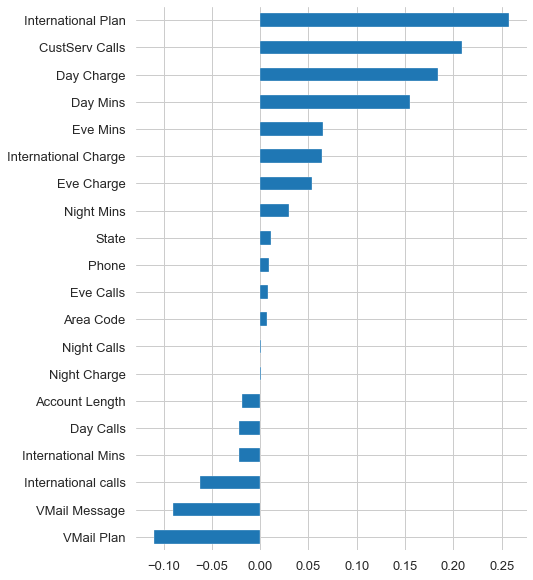

In [29]:
# checking the random Variable correlation wirh the Target Variable

sns.set_style(style='whitegrid')
data_corr = data2.corr()
data_corr.Churn.sort_values()[:-1].plot(kind='barh',figsize = (7,10),fontsize = 13)

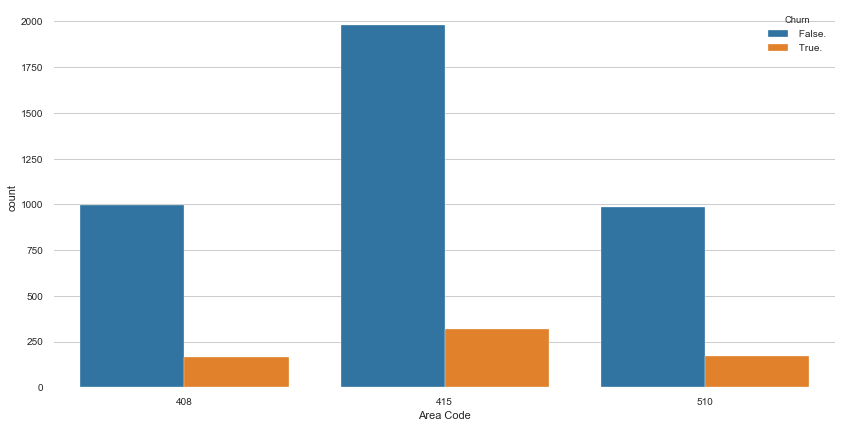

In [63]:
# finding the churn of customers by area code

plt.figure(figsize=(14,7))
sns.countplot(x ='Area Code' ,hue = 'Churn' ,data=data,orient=90)

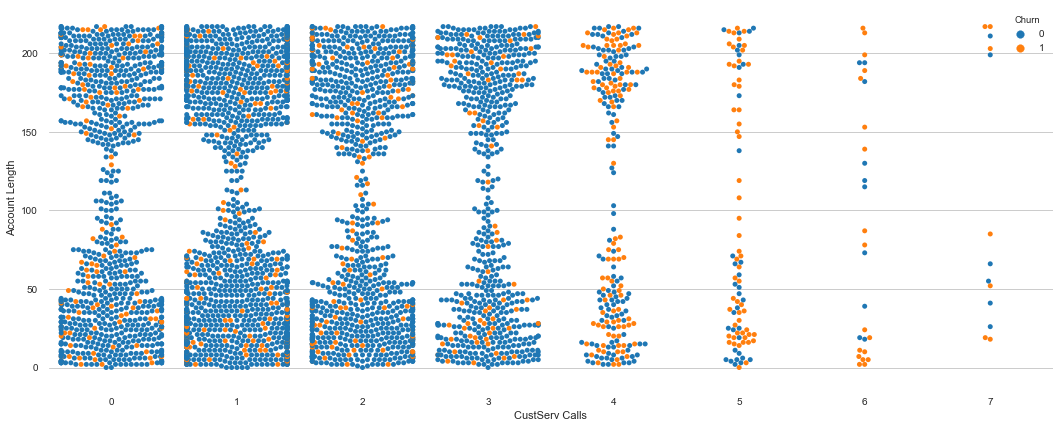

In [31]:
# Relation between customer service calls and total Account length of an customer and the churn rate of customer

plt.figure(figsize=(18,7))
sns.swarmplot(data=data2[data2['CustServ Calls'] <= 7 ], hue='Churn',y = 'Account Length',x= 'CustServ Calls')

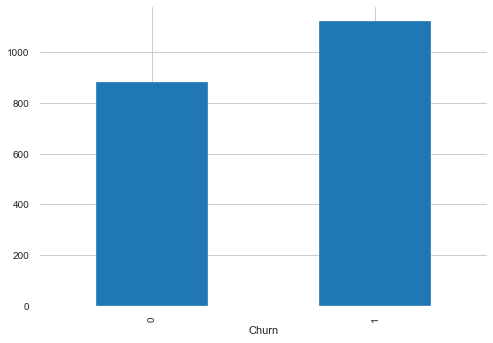

In [40]:
# Average of a daily call charge between Churn and No Churn Customer

data2.groupby('Churn')['Day Charge'].mean().plot.bar()

### Starting Modeling Of the Data

In [46]:
# Divideing the data as Target and Feature Variabl

X = data2.drop(columns='Churn',axis=0)
y = data2.loc[:,['Churn']]

### Importing packages for modeling

In [45]:
# packages for simplify the modeling , testing and evaluation purpose

from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN 
from imblearn.pipeline import make_pipeline as imp

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,XGBRegressor
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline as mp
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

from scikitplot.metrics import plot_confusion_matrix, plot_precision_recall_curve
from scikitplot.estimators import plot_feature_importances,plot_learning_curve 

### Spliting the data for training and testing

In [47]:
# Train data 70% and test data 30% spliting

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Steps for modeling data

1. Define the pipeline 
2. Select best features
3. Scale the data
4. train the model
5. Evaluate the model

### Support Vector Classifier

In [35]:
# Defineing pipeline for modeling of the data

model = mp(SelectKBest(chi2,k=17),StandardScaler(),SVC(kernel='rbf',degree=5))
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=17,
                             score_func=<function chi2 at 0x000002568A6F9948>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=5,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [36]:
# Checking the accuracy of the model

accuracy_score(y_test,model.predict(X_test))

0.9018759018759018

### Randomforest Classifier

In [37]:
model2 = mp(SelectKBest(chi2,k=17),StandardScaler(),RandomForestClassifier())
model2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=17,
                             score_func=<function chi2 at 0x000002568A6F9948>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                  

In [38]:
# Checking accuracy of Random forest classifier

accuracy_score(y_test,model2.predict(X_test))

0.9502164502164502

Confusion Matrix

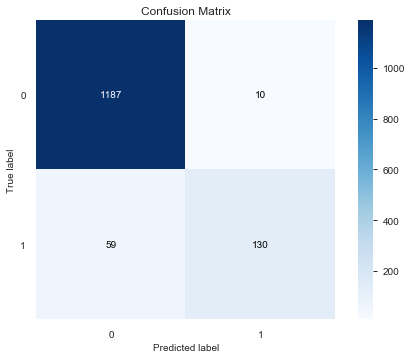

In [39]:
# confusion metrix of support vector classifiera

plot_confusion_matrix(y_test,model2.predict(X_test))

### XGboost Classifier 

In [40]:
model3 = mp(SelectKBest(chi2,k=16),StandardScaler(),XGBClassifier())
model3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=16,
                             score_func=<function chi2 at 0x000002568A6F9948>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],


In [41]:
# Checking accuracy of XGBClassifier

accuracy_score(y_test,model3.predict(X_test))

0.9336219336219336

Over Sampling With the minority class to balance the dataset and then applying classification

In [42]:
model_osm = imp(SMOTE(),SelectKBest(chi2,k=15),StandardScaler(),RandomForestClassifier())
model_osm.fit(X_train.values,y_train.values)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=None,
                       sampling_strategy='auto')),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function chi2 at 0x000002568A6F9948>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
            

In [43]:
# accuracy by balanceing the dataset

accuracy_score(y_test,model_osm.predict(X_test))

0.9011544011544012

Undersampling the majority class and applying the modeling

In [44]:
model_osm1 = imp(NearMiss(),SelectKBest(chi2,k=18),StandardScaler(),RandomForestClassifier(random_state=4))
model_osm1.fit(X_train.values,y_train.values)

Pipeline(memory=None,
         steps=[('nearmiss',
                 NearMiss(n_jobs=None, n_neighbors=3, n_neighbors_ver3=3,
                          sampling_strategy='auto', version=1)),
                ('selectkbest',
                 SelectKBest(k=18,
                             score_func=<function chi2 at 0x000002568A6F9948>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_

In [45]:
# Accuracy of the model by undersampling

accuracy_score(y_test,model_osm1.predict(X_test))

0.6825396825396826

In [48]:
# Final Modeling of the data

model_final = mp(SelectKBest(chi2,k=16),StandardScaler(),RandomForestClassifier(n_estimators=700,random_state = 3))
model_final.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=16,
                             score_func=<function chi2 at 0x0000017492D16048>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=700, n_jobs=None,
                  

In [56]:
# Final accuracy score

accuracy_score(y_test,model_final.predict(X_test))

0.9444444444444444

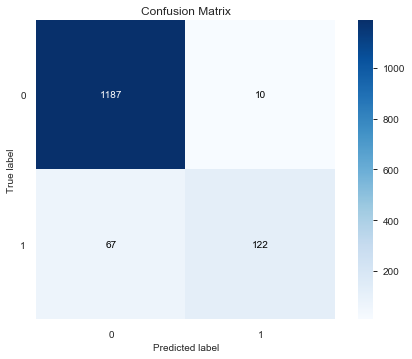

In [57]:
plot_confusion_matrix(y_test,model_final.predict(X_test))

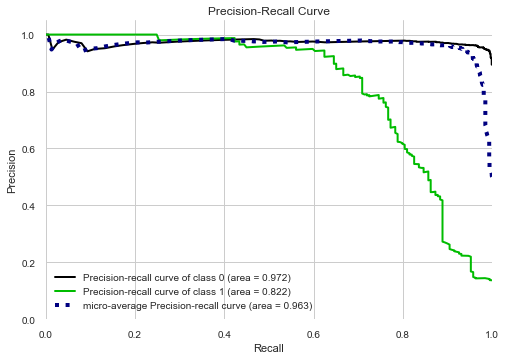

In [58]:
# Precision and recall curve to measure the minority class 

plot_precision_recall_curve(y_test,model_final.predict_proba(X_test))

Learning curve between train score and test score

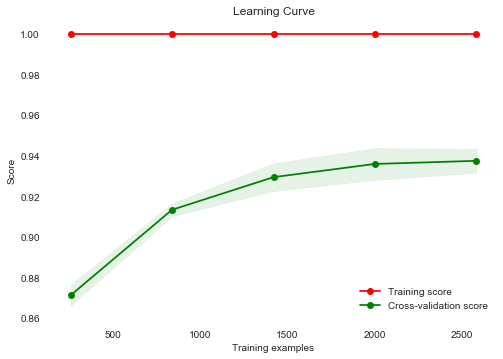

In [64]:
# learning Curve 

plot_learning_curve(model_final , X=X_train , y=y_train , cv =5)

Predicting if a customer is going to leave or not by setting up a limit above of 0.75 probability threshold 

In [117]:
def churn(var):
    if var >= 0.75:
        print ('churn flag = 0')
    else:
        print('churn flag = 1')

In [141]:
score = model_final.predict_proba(X_test)[3][0]

In [142]:
churn(score)

churn flag = 0


In [139]:
score1 = model_final.predict_proba(X_test)[6][0]

In [140]:
churn(score1)

churn flag = 1


In [113]:
y_test.iloc[121]

Churn    0
Name: 445.0, dtype: int32

In [114]:
y_test.head(10)

,Churn
13.0,0
2613.0,0
3545.0,0
189.0,0
3135.0,0
2736.0,0
1935.0,1
2104.0,0
1486.0,0
1049.0,0
